# 3B1B - Fractals Animation

## Contributors


*   Cadiang, Ivan Cassidy A.
*   Solas, Rohan B.




### Introduction to Fractals

Whenever we apply Newton's method on real numbers, we often just get its real roots by jumping all over the number line. Interesting things happen when we apply this iterative method to complex values (i.e. $z=x+iy$ where $i=\sqrt{-1}$).
This concept came from the pretty animation from 3Blue1Brown: https://www.youtube.com/watch?v=-RdOwhmqP5s&t=1071s&ab_channel=3Blue1Brown

In [ ]:
# Importing numpy
import numpy as np
from numpy.polynomial import polynomial as poly

# Importing plotting tools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

# Other imports that you may need. Make sure that they are installed in Google colaboratory.
from matplotlib import colors

Define a set of roots called $\texttt{roots}$ that contains at least 3 zeroes $\texttt{\{z_1,z_2,...,z_k\}}$, where $z_k=x_k+iy_k$. In python, this can be done using $\texttt{complex(x_k,y_k)}$.

In [ ]:
# Defining arbitrary roots. Repeated roots will be deleted.
roots = { # z = complex(x,y) = x + iy
    complex(-0.5, 0.866025),
    complex(-0.5, -0.866025),
    complex(1,0),
}
print(roots)

{(-0.5+0.866025j), (-0.5-0.866025j), (1+0j)}


From the roots, we create a polynomial $f(x)=a_nx^n + a_{n-1} x^{n-1} + ... + a_1 x + a_0$ using $\texttt{poly.polyfromroots()}$ and take its derivative. We now have two lists containing complex coefficients.

In [ ]:
def my_polyder(coeffs):
    n = len(coeffs) - 1
    polyder_coeffs = [(n - i) * coeffs[i] for i in range(n)]
    return polyder_coeffs

f_arr = poly.polyfromroots(list(roots)) # creates list of coefficients of a polynomial with roots listed in list(roots)
fprime_arr = my_polyder(f_arr) # creates list of coefficients of the derivative of the polynomial

print("Function array:", f_arr)
print("Derivative function array:", fprime_arr)
print("Roots:", list(roots))

Function array: [-9.99999301e-01+0.j -6.99375000e-07+0.j  0.00000000e+00+0.j
  1.00000000e+00+0.j]
Derivative function array: [(-2.999997901875+0j), (-1.3987499998258102e-06+0j), 0j]
Roots: [(-0.5+0.866025j), (-0.5-0.866025j), (1+0j)]


Then, we define plot dimensions. This may be adjusted later on if ever we want to zoom in or out of the diagram.

In [ ]:
# Define plot dimensions (ranges are limited to integers)
x_range = [-2, 2]
y_range = [-2, 2]

res_per_unit = 200 # you may change this to a lower value for debugging purposes, but return it to 200 afterwards.

# Define real and imaginary axes
re = np.linspace(x_range[0], x_range[1], (x_range[1] - x_range[0]) * res_per_unit) # x-axis; 200 evenly spaced numbers from -2 to 2
im = np.linspace(y_range[0], y_range[1], (y_range[1] - y_range[0]) * res_per_unit) # resulting y-axis, multiply with 1j

X_newton = np.array([[complex(r, i) for r in re] for i in im])

print(X_newton)

[[-2.        -2.j         -1.99499374-2.j         -1.98998748-2.j
  ...  1.98998748-2.j          1.99499374-2.j
   2.        -2.j        ]
 [-2.        -1.99499374j -1.99499374-1.99499374j -1.98998748-1.99499374j
  ...  1.98998748-1.99499374j  1.99499374-1.99499374j
   2.        -1.99499374j]
 [-2.        -1.98998748j -1.99499374-1.98998748j -1.98998748-1.98998748j
  ...  1.98998748-1.98998748j  1.99499374-1.98998748j
   2.        -1.98998748j]
 ...
 [-2.        +1.98998748j -1.99499374+1.98998748j -1.98998748+1.98998748j
  ...  1.98998748+1.98998748j  1.99499374+1.98998748j
   2.        +1.98998748j]
 [-2.        +1.99499374j -1.99499374+1.99499374j -1.98998748+1.99499374j
  ...  1.98998748+1.99499374j  1.99499374+1.99499374j
   2.        +1.99499374j]
 [-2.        +2.j         -1.99499374+2.j         -1.98998748+2.j
  ...  1.98998748+2.j          1.99499374+2.j
   2.        +2.j        ]]


In [ ]:
# Define iterative parameters
newton_iterations = 25 # number of newton iterations to animate

We now create a function called $\texttt{newton_iter(zgrid, f, fprime)}$ that performs an iteration of the Newton's method given the array of coefficients $\texttt{f}$ and $\texttt{fprime}$. It takes in a 2D numpy array $\texttt{zguess}$ containing all points in the grid. It outputs a numpy array of computed values.

In [ ]:
def newton_iter(zgrid, f, fprime):
    # Evaluate f and fprime at all points in the grid
    # Note that f is a function of z, where z = x + iy (point on the complex plane)
    f_vals = np.polyval(f, zgrid)
    fprime_vals = np.polyval(fprime, zgrid)

    # Compute the next guess for each point in the grid using Newton's method
    z_next = zgrid - (f_vals / fprime_vals)

    return z_next # numpy array of computed values

Next, we define a function called $\texttt{compute_fractal(n)}$ that generates 2D array**s** of the fractal values. Take note that the initial frame does not perform Newton's method (i.e., *Voronoi diagram*).  The output value is the index of the root (from set $\texttt{roots}$ converted to list) that is closest.

Remember that the X array contains **hundreds of thousands** of values so we need to make sure to make this as FAST as possible. Hence, it is recommended to use **Numpy**'s methods as large array computations are relatively quick.

For computation of proximity from the root, we use the **absolute error** between the $z$ value and the root.

In [ ]:
root_list = np.full(len(roots), list(roots))

def abs_proxim(z_val):
  # Takes absolute error of z_val with each root and returns only index with smallest error
  err_list = np.absolute(root_list - z_val)
  return np.argmin(err_list)

vectorized_proxim = np.vectorize(abs_proxim) # need to transform function such that it can be mapped to 2d array

# global variable to store fractal values for each iter
fractal_values = np.empty((newton_iterations, (x_range[1] - x_range[0]) * res_per_unit, (y_range[1] - y_range[0]) * res_per_unit))

def compute_fractal(X, n):
  # Starting with initial points in X, compute proximity of each point from the roots, replace elements with the index of root that is closest
  # Compute z_next using newton_iter
  # Repeat n times

  cur_arr = X
  for i in range(n):
    global fractal_values
    fractal_values[i] = vectorized_proxim(cur_arr)
    next_arr = newton_iter(cur_arr, f_arr, fprime_arr)
    cur_arr = next_arr

  return None # shouldn't return anything

compute_fractal(X_newton, newton_iterations)

Since we will be doing an animation, we will be defining a new function $\texttt{create_frame(n)}$ that creates the frames from the arrays obtained from the methods to be implemented above. Its output should be an image given a frame to be used in the final cell.

In [ ]:
cmap = colors.ListedColormap(['black', 'mediumvioletred', 'lemonchiffon']) # custom color map

def create_frame(n):
  # updates frame based on frame number n
  img = plt.imshow(fractal_values[n], cmap=cmap, interpolation="none", animated = True)
  return [img]

Results can be viewed here, as an animated frame! Start with $\texttt{newton_iterations = 3}$. However, the code should be able to render $\texttt{newton_iterations = 25}$ in a few minutes.

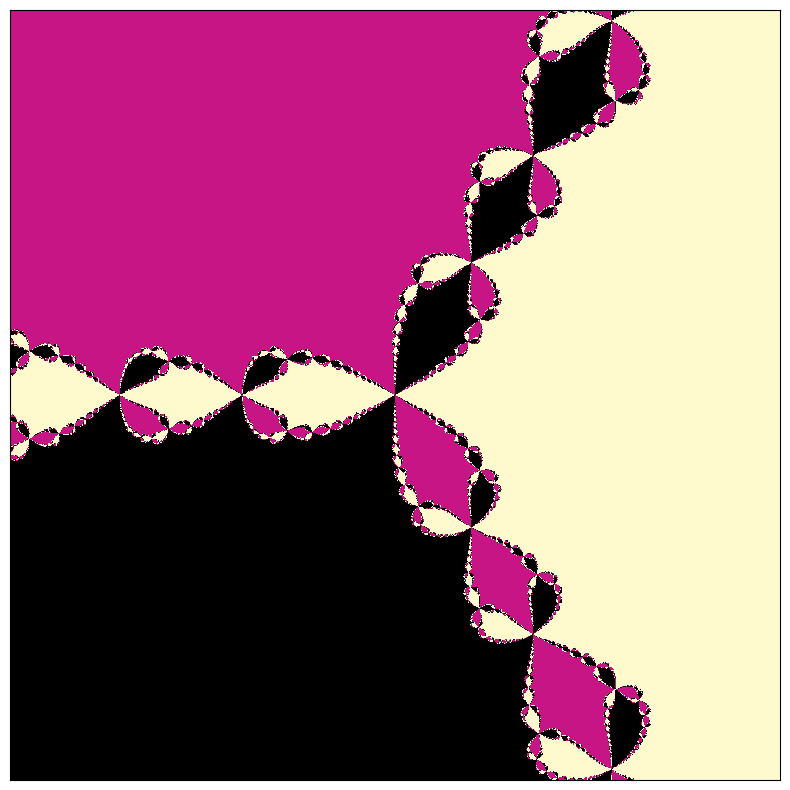

In [ ]:
rc('animation', html='jshtml')
fig = plt.figure(figsize=(10, 10)) # save figure to animate
ax = plt.axes() # add axes to current plot
ax.set_xticks([])
ax.set_yticks([])
# plt.close(fig) # close figure window
animation.FuncAnimation(fig, create_frame, frames=newton_iterations, blit=True, repeat=True)

---